In [1]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# Set the working directory
# ! cd gdrive/Team\ Drives/EE599\ Project/Phase\ 1/src
! pwd
! ls

/content
gdrive	sample_data  train40.tfrecords


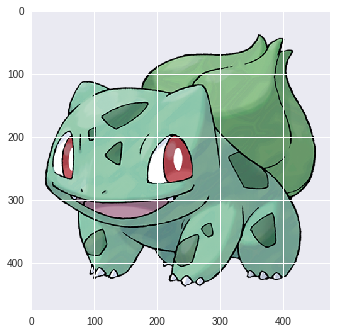

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy

# Read a image
img = mpimg.imread('/content/gdrive/Team Drives/EE599 Project/Phase 1/new_train/001/1.png')
imgplot = plt.imshow(img)

In [0]:
# Make our own dataset -- TFRecord

import tensorflow as tf
import os
from PIL import Image

path = '/content/gdrive/Team Drives/EE599 Project/Phase 1/new_train/'
writer = tf.python_io.TFRecordWriter("train40.tfrecords")

for i in range(1, 41):
  # get path for eaach classes
  class_path = path
  nz = 3
  j = i
  while (j > 0):
    j = int(j / 10)
    nz -= 1
  while (nz > 0):
    class_path = class_path + '0'
    nz -= 1
  class_path = class_path + str(i) + '/'
  
  for img_name in os.listdir(class_path):
        img_path = class_path + img_name # image path

        img = Image.open(img_path)
        img = img.resize((28, 28))
        img_raw = img.tobytes() # Convert to binary

        # example对象对label和image数据进行封装
        example = tf.train.Example(
            features=tf.train.Features(
                feature={
                    "label": tf.train.Feature(int64_list=tf.train.Int64List(value = [i])),
                    'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value = [img_raw]))
                }
            )
        )
        # 将序列转为字符串
        writer.write(example.SerializeToString())

writer.close()

! ls

In [15]:
# Move the .tfrecords file to Google Drive
# ! cp train40.tfrecords gdrive/Team\ Drives/EE599\ Project/Phase\ 1/new_train/train40.tfrecords
! ls gdrive/Team\ Drives/EE599\ Project/Phase\ 1/new_train/

001  005  009  013  017  021  025  029	033  037  train40.tfrecords
002  006  010  014  018  022  026  030	034  038
003  007  011  015  019  023  027  031	035  039
004  008  012  016  020  024  028  032	036  040


In [0]:
# Read TFRords
import os
import tensorflow as tf 
from PIL import Image
    
def read_and_decode(filename):
    #根据文件名生成一个队列
    filename_queue = tf.train.string_input_producer([filename])

    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)   #返回文件名和文件
    features = tf.parse_single_example(serialized_example,
                                       features={
                                           'label': tf.FixedLenFeature([], tf.int64),
                                           'img_raw' : tf.FixedLenFeature([], tf.string),
                                       })

    img = tf.decode_raw(features['img_raw'], tf.uint8)
    img = tf.reshape(img, [28, 28, 3])
    img = tf.cast(img, tf.float32) * (1. / 255) - 0.5
    label = tf.cast(features['label'], tf.int32)

    return img, label
  
# img, label = read_and_decode("train40.tfrecords")
# print(img)
# print(label)